In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import copy

#Problem 5

## b)

In [ ]:
A = np.array([
              
[2,-1,0,0,0,0,0,0,0,0],
[-1,2,-1,0,0,0,0,0,0,0],
[0,-1,2,-1,0,0,0,0,0,0],
[0,0,-1,2,-1,0,0,0,0,0],
[0,0,0,-1,2,-1,0,0,0,0],
[0,0,0,0,-1,2,-1,0,0,0],
[0,0,0,0,0,-1,2,-1,0,0],
[0,0,0,0,0,0,-1,2,-1,0],
[0,0,0,0,0,0,0,-1,2,-1],
[0,0,0,0,0,0,0,0,-1,2]

])

A

array([[ 2, -1,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  2, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  2, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  2, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  2, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  2, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  2, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  2, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  2, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  2]])

In [ ]:
u0 = np.random.rand(10)
u0 = u0/np.linalg.norm(u0)

In [ ]:
def power_method(u0, A, k):
  """
  This function computes power method kth eigenvector estimate
  """
  uk = np.linalg.matrix_power(A,k) @ u0
  return uk/np.linalg.norm(uk)

def l(u0,A,k):
  """
  This computes PM kth eigenvalue estimate
  """
  vk_1 = power_method(u0,A,k-1)
  return vk_1.T@A@vk_1

def lambda1(u0,A,tol):
  """
  This function returns eigenvalue and eigenvector under the condition for
  |lambda_k - lambda_k-1| < tol
  """
  u = u0
  v = u0
  l_1 = 0
  l = 1
  counter = 0
  while abs(l - l_1) > tol:
    l_1 = l 
    l = u.T@A@u
    v = A@v
    u = v/np.linalg.norm(v)
    counter += 1
  print(counter)
  return l, u

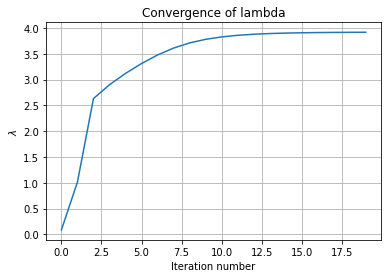

In [ ]:
n = 20

y = [l(u0,A,i) for i in range(n)]
x = list(range(n))

plt.plot(x,y)
plt.title('Convergence of lambda')
plt.ylabel('$\lambda$')
plt.xlabel('Iteration number')
plt.grid()

In [ ]:
l,u = lambda1(u0,A, 0.0000001)
print('Eigenvalue: ', l, '\nEigenvector:', u)

48
Eigenvalue:  3.9189856851671143 
Eigenvector: [ 0.12011413 -0.23055591  0.32238481 -0.38810397  0.42230533 -0.42217051
  0.38774208 -0.32191032  0.23011935 -0.11985443]


##c)

In [ ]:
def QR(A, tol):
  """
  This function applies the QR alg from the book page 427. It takes in the 
  matrix along with the tolerance value for lower triangular values and returns
  a list of eigenvalues
  """
  check = [0,]
  Ak = A
  counter = 0
  while not all(check):
    #checking that all lower triangular elements of A fit the tolerance limit
    check = []
    for i in range(Ak.shape[0]):
      for j in range(Ak.shape[1]):
        if i>j:
          check.append(abs(Ak[i][j]) < tol)

    Q,R = np.linalg.qr(Ak)
    Ak = R@Q
    counter += 1
  print('Iterations:', counter)
  
  return np.diag(Ak)

In [ ]:
#finding the eigenvalues

ls = QR(A, 0.001)
print('Eigenvalues: ', ls)

Iterations: 100
Eigenvalues:  [3.91898253 3.68251048 3.30972147 2.83083003 2.28462968 1.71537032
 1.16916997 0.69027853 0.31749293 0.08101405]


In [ ]:
def inv_alg(A,s,tol):

  """
  This function implements the alg from the book page 424. It takes in the 
  matrix, shift and tolerance value for error in eigenvector entries and returns
  the eigenvector asociated with the smallest abs eigenvalue of A-sI
  """

  v = np.random.rand(A.shape[0])
  v = v/np.linalg.norm(v)
  counter = 0
  oldv = 2*np.ones(len(v))

  while not all([abs(oldv[i] - v[i]) < tol for i in range(len(v))]):
    oldv = copy.deepcopy(v)
    v = np.linalg.solve((A-s*np.identity(A.shape[0])), v)
    v = v/np.linalg.norm(v)
    counter += 1
  print('Iterations:',counter)
  return v


In [ ]:
# corresponding eigenvector to the first eigenvector

E = inv_alg(A,ls[0],0.0001)
print('Eigenvalue: ', ls[0], '\nEigenvector:', E)

Iterations: 2
Eigenvalue:  3.9189825281731214 
Eigenvector: [-0.12013117  0.23053002 -0.3222527   0.38786839 -0.42206128  0.42206128
 -0.38786839  0.3222527  -0.23053002  0.12013117]


#Problem 6

In [ ]:
# Generate a random matrix 

def diag_dom(n,dd):
  A = np.random.uniform(-1,1,(n,n))
  for i in range(n):
    A[i][i] = 0
    A[i][i] = sum(abs(A[i]))*dd
  return A


In [ ]:
A = diag_dom(5,3)
A

array([[ 7.33777517, -0.70353701,  0.04941792, -0.8833259 , -0.80964424],
       [-0.17342161,  4.79596113,  0.06358855, -0.47322885,  0.8884147 ],
       [ 0.53439106, -0.03547743,  5.64137472,  0.31707042, -0.99351933],
       [-0.63910604,  0.47868863,  0.32929875,  6.46015176, -0.70629049],
       [-0.70818355,  0.89423184,  0.57426279,  0.54254738,  8.15767668]])

In [ ]:
b = np.random.rand(5)
b

array([0.2805962 , 0.40764915, 0.29739143, 0.09123554, 0.80664535])

In [ ]:
x0 = np.zeros(5)
x0

array([0., 0., 0., 0., 0.])

In [ ]:
def simple_iter(A,b,x0,method,n = 25):

  """
  This function applies simple iteration method and returns an array of residual
  norms
  """
  if method == 'Jacobi':
    M = np.diag(np.diag(A))
  elif method == 'Gauss':
    M = np.tril(A)

  r0 = b - A@x0
  z = np.linalg.solve(M,r0)
  x = x0
  rs = [np.linalg.norm(r0),]
  for i in range(n):
    x = x+z
    r = b - A@x
    rs.append(np.linalg.norm(r))
    z = np.linalg.solve(M,r)
  
  return(rs)

Text(0.5, 1.0, 'Residual norm vs iteration number with n = 5 dd = 3')

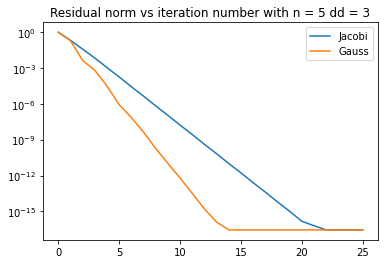

In [ ]:
n = 5
dd = 3
plt.plot(simple_iter(A,b,x0,'Jacobi'), label = 'Jacobi')
plt.plot(simple_iter(A,b,x0,'Gauss'), label = 'Gauss')
plt.semilogy()
plt.legend()
plt.title('Residual norm vs iteration number with n = ' + str(n) + ' dd = ' + str(dd))

In [ ]:
def plot(n,dd):

  """
  This function is implemented the procedure above combined
  """

  A = diag_dom(n,dd)
  b = np.random.rand(n)
  x0 = np.zeros(n)

  plt.plot(simple_iter(A,b,x0,'Jacobi'), label = 'Jacobi')
  plt.plot(simple_iter(A,b,x0,'Gauss'), label = 'Gauss')
  plt.ylabel('r norm')
  plt.xlabel('iter n')
  plt.semilogy()
  plt.legend()
  plt.title('Residual norm vs iteration number with n = ' + str(n) + ' dd = ' + str(dd))

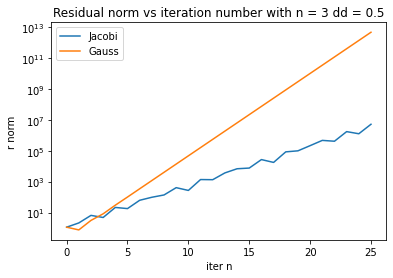

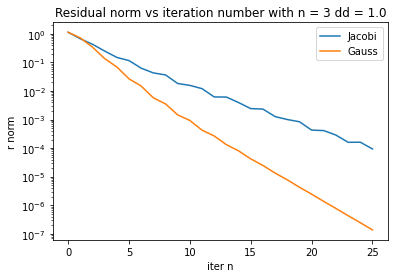

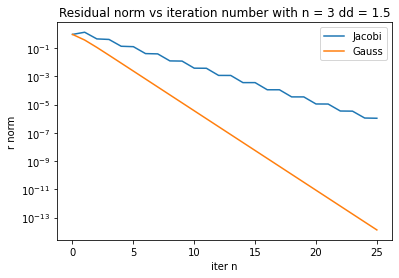

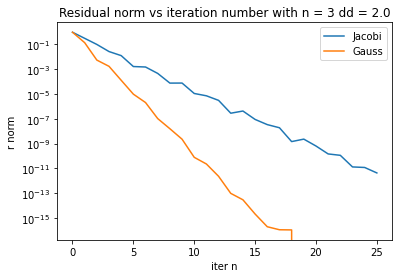

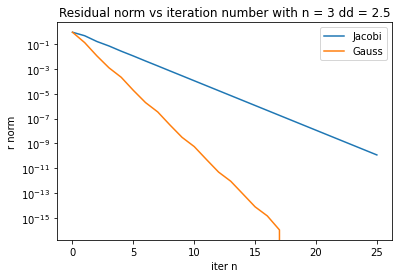

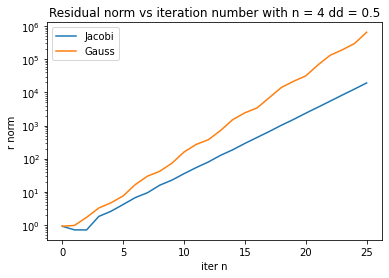

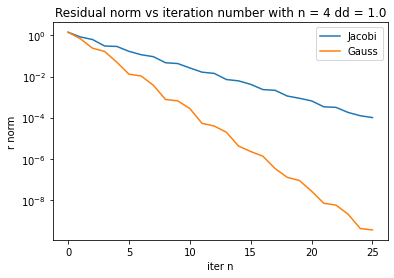

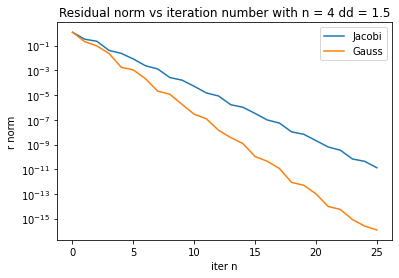

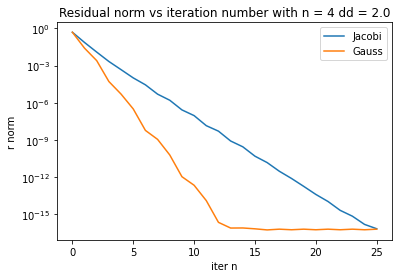

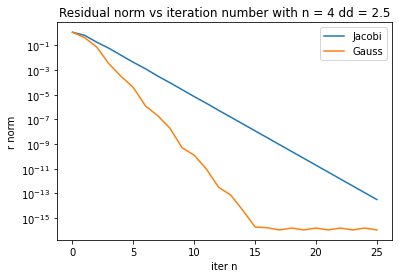

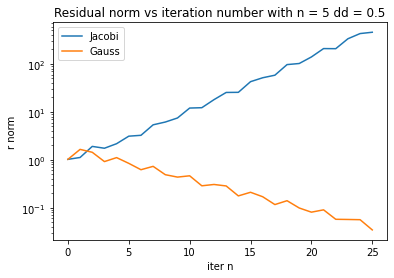

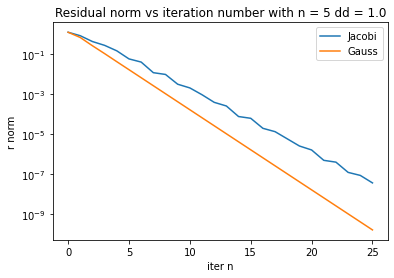

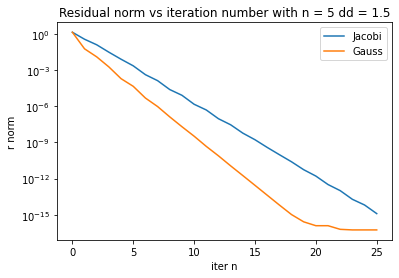

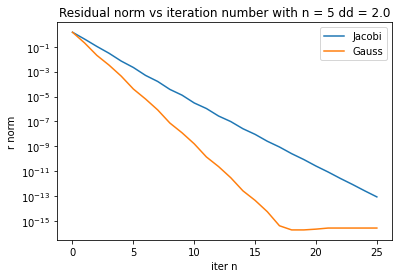

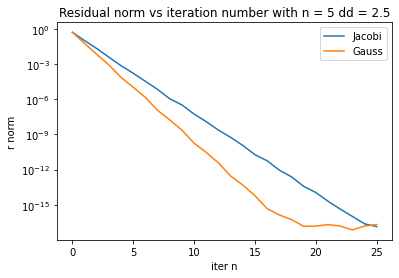

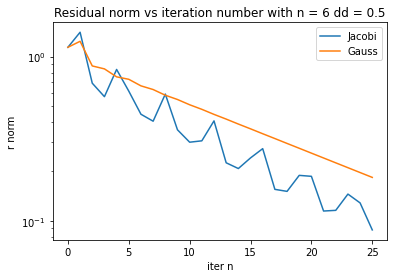

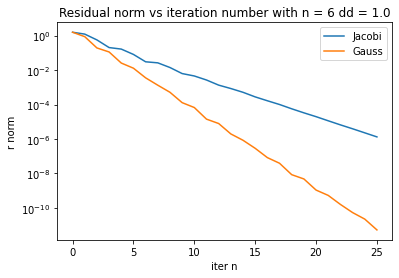

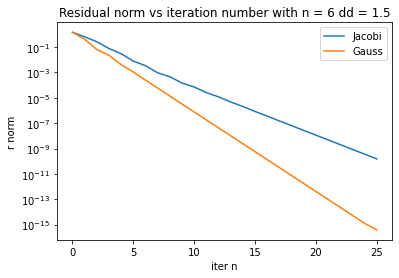

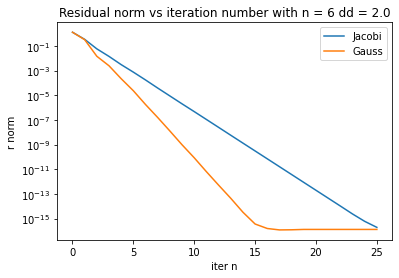

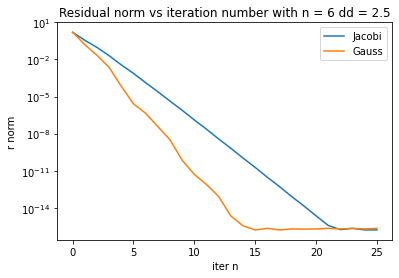

In [ ]:
for i in range(3,7):
  for j in np.arange(0.5, 3, 0.5):
    plt.figure()
    plot(i,j)